<a href="https://colab.research.google.com/github/binodmathews93/GUVI-DeepLearning/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets

##Loading Dataset

In [2]:
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
Y = breast_cancer.target

In [3]:
df = pd.DataFrame(X , columns=breast_cancer.feature_names)
df["Class"] = Y

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
df.shape

(569, 31)

In [7]:
print(df["Class"].value_counts())

1    357
0    212
Name: Class, dtype: int64


In [8]:
print(breast_cancer.target_names)

['malignant' 'benign']


##Train-Test-split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop(["Class"] , axis=1)
Y = df["Class"]

In [11]:
X_train, X_test , Y_train , Y_test = train_test_split(X, Y , test_size = 0.1 , stratify = Y , random_state = 1)

##Perceptron Class

$y=1,\mbox{if}\sum_iw_ix_i>=b $

$y=0,\mbox{otherwise}$

In [12]:
from sklearn.metrics import accuracy_score

In [75]:
class Perceptron:

  def __init__(self):
    self.w = None
    self.b = None

  def model(self,x):
    return 1 if (np.dot(self.w,x) >= self.b) else 0

  def predict(self,X):
    Y = []
    for x in X:
      Y.append(self.model(x))
    return np.array(Y)

  def fit(self,X,Y,epochs=5,lr=1):
    # initalize w and b
    self.w = np.ones(X.shape[1])
    self.b = 0
    accuracy = {}
    max_accuracy = 0

    wt_matrix = []

    # learning by adjusting w and b based on comparing dot product of w,x with b
    for i in range(epochs):
      for x,y in zip(X,Y):
        y_pred = self.model(x)
        if y == 0 and y_pred == 1:
          self.w = self.w - lr*x
          self.b = self.b - lr*1
        if y == 1 and y_pred == 0:
          self.w = self.w + lr*x
          self.b = self.b + lr*1

      wt_matrix.append(self.w)
      accuracy[i] = accuracy_score(self.predict(X),Y)
      if max_accuracy < accuracy[i]:
        max_accuracy = accuracy[i]
        checkptw = self.w
        checkptb = self.b

    self.w = checkptw
    self.b = checkptb

    print("max accuracy is " + str(max_accuracy))
    
    # plotting accuracy of all epochs
    lists = sorted(accuracy.items())
    ind , val = zip(*lists)
    plt.plot(ind,val)
    plt.ylim([0,1])
    plt.show()
      
    return np.array(wt_matrix)

In [76]:
perceptron = Perceptron()

In [ ]:
X_train = X_train.values
X_test = X_test.values

max accuracy is 0.92578125


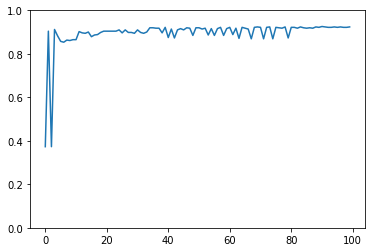

In [87]:
wt_matrix = perceptron.fit(X_train,Y_train,100,0.01)

In [88]:
Y_pred_test = perceptron.predict(X_test)
print(accuracy_score(Y_pred_test,Y_test))

0.9473684210526315


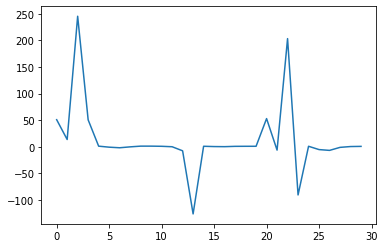

In [89]:
plt.plot( wt_matrix[-1,:])
plt.show()

## Animating the weights(w)
Code used from "http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/"

In [68]:
%matplotlib inline

from matplotlib import animation, rc
from IPython.display import HTML

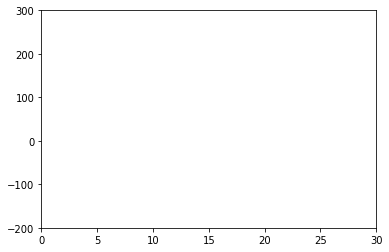

In [90]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-200, 300))

line, = ax.plot([], [], lw=2)

In [91]:
# animation function. This is called sequentially
def animate(i):
    x = range(wt_matrix.shape[1])
    y = wt_matrix[i , :]
    line.set_data(x, y)
    return (line,)

In [96]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=100, interval=200, blit=True)

In [97]:
HTML(anim.to_html5_video())